In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
from tabulate import tabulate

mpl.style.use("fivethirtyeight")

## 1.

Let $X_n$ be the number of dollars after the $n$-th play.
Then,

$$
\mathbb{E}( X_{n + 1} \mid X_n )
= \frac{1}{2} \left( 2 X_n + \frac{1}{2} X_n \right)
= \frac{5}{4} X_n.
$$

By the rule of iterated expectations $\mathbb{E} X_{n + 1} = (5 / 4) \mathbb{E} X_n$.
By induction, $\mathbb{E}X_n = (5 / 4)^n c$.

## 2.

If $\mathbb{P}(X = c) = 1$, then $\mathbb{E}(X)^2 = \mathbb{E}(X^2) = c^2$ and hence $\mathbb{V}(X) = 0$.

The converse is more complicated.
We claim that if $Y$ is a nonnegative random variable, $\mathbb{E}Y=0$ implies $Y=0$ almost everywhere.
In this case, it is sufficient to take $Y=(X-\mathbb{E}X)^{2}$ to conclude that $\mathbb{P}(X=c)=1$.

To substantiate the claim, assume $\mathbb{E}Y=0$.
Let be an arbitrary positive integer and $A_{n}=\{Y\geq1/n\}$.
Then,

$$
0=\mathbb{E}Y\geq\mathbb{E}(Y I_{A_{n}})\geq\frac{1}{n}\mathbb{P}(A_{n})
$$

and hence $\mathbb{P}(A_{n})=0$. By continuity of probability,

$$
\mathbb{P}(Y>0)=\mathbb{P}(\cup_{n}A_{n})=\lim_{n}\mathbb{P}(A_{n})=0.
$$

## 3.

Since $F_{Y_n}(y) = \mathbb{P}(X_1 \leq y)^n = y^n$, it follows that $f_{Y_n}(y) = n y^{n-1}$ on $(0, 1)$.
Therefore,

$$
\mathbb{E} Y_n = n \int_0^1 y^n dy = \frac{n}{n + 1}.
$$

## 4.

Note that $X_n = \sum_{k = 1}^n Y_n$ where $Y_n$ is -1 or 1.
Therefore,

$$
\mathbb{E} X_n
= \sum_{k = 1}^n \mathbb{E} Y_n
= \sum_{k = 1}^n 1 - 2p
= n(1 - 2p).
$$

and

$$
\mathbb{V} X_n
= n \mathbb{V} Y_1
= n (\mathbb{E} Y_1^2 - (\mathbb{E} Y_1)^2)
= 4np(1 - p).
$$

In [148]:
p = 1. / 3.
n = 10

Y = 2 * (np.random.rand(1_000_000, n) < 1 - p) - 1
X = Y.sum(axis=1)

np.testing.assert_almost_equal(X.mean(), n * (1. - 2 * p), decimal=2)
np.testing.assert_almost_equal(X.var(), 4 * n * p * (1. - p), decimal=2)

## 5.

Let $N$ be the number of tosses required and $C$ be the result of the first toss.
Then,

$$
\mathbb{E} N
= \frac{1}{2} ( \mathbb{E} (N \mid C = H) + \mathbb{E} (N \mid C = T) )
= \frac{1}{2} ( 1 + (1 + \mathbb{E} N) ).
$$

Solving the above equation yields $\mathbb{E} N = 2$.

## 6.

By disjoint additivity,

$$
\mathbb{P}(Y=y)=\mathbb{P}(r(X)=y)=\mathbb{P}(X\in r^{-1}(\{y\}))=\sum_{x\in r^{-1}(\{y\})}\mathbb{P}(X=x).
$$

It follows that

$$
\mathbb{E}Y=\sum_{y}y\sum_{x\in r^{-1}(\{y\})}\mathbb{P}(X=x)=\sum_{y}\sum_{x\in r^{-1}(\{y\})}r(x)\mathbb{P}(X=x)=\sum_{x}r(x)\mathbb{P}(X=x)=\mathbb{E}r(X).
$$

## 7.

By the product rule,

$$
(x F(x))^\prime = F(x) + x f(x).
$$

Integrating both sides from 0 to $y$ yields

$$
y F(y) = \int_0^y F(x) dx + \int_0^y x f(x) dx.
$$

Moving terms around and taking limits,

$$
\int_0^\infty x f(x) dx
= \lim_{y \rightarrow \infty} y F(y) - \int_0^y F(x) dx
= \lim_{y \rightarrow \infty} \int_0^y F(y) - F(x) dx.
= \lim_{y \rightarrow \infty} \int_0^\infty (F(y) - F(x)) I_{(0, y)}(x) dx.
$$

Let $G_y(x) = (F(y) - F(x)) I_{(0, y)}(x)$.
Note that $G_y$ converges pointwise to $1 - F(x) = \mathbb{P}(X > x)$.
Moreover, $G_y$ is monotone increasing.
By the Beppo-Levi theorem,

$$
\int_0^\infty x f(x) dx = \int_0^\infty \mathbb{P}(X > x) dx.
$$

## 8.

The first two claims follow from

$$
\mathbb{E} \overline{X}
= \frac{1}{n} \sum_i \mathbb{E} X_{i}
= \mathbb{E} X_1
= \mu
$$

and

$$
\mathbb{V} \overline{X}
= \frac{1}{n^2} \sum_i \mathbb{V} X_{i}
= \frac{1}{n} \mathbb{V} X_1
= \frac{\sigma^2}{n}.
$$

As for the final claim, note that

$$
\left(n-1\right)S_{n}^{2}=\sum_{i=1}^{n}\left(X_{i}-\overline{X}\right)^{2}=\sum_{i=1}^{n}X_{i}^{2}-2X_{i}\overline{X}+\overline{X}^{2}
$$

and hence

$$
\frac{n-1}{n}\mathbb{E}(S_{n}^{2})=\mathbb{E}(X_{1}^{2})-2\mathbb{E}(X_{1}\overline{X})+\mathbb{E}(\overline{X}^{2}).
$$

Note that $\mathbb{E}(X_{1}^{2})=\sigma^{2}+\mu$ and $\mathbb{E}(\overline{X}^{2})=\sigma^{2}/n+\mu^{2}$.
Moreover,

$$
X_{1}\overline{X}=\frac{1}{n}X_{1}\left(X_{1}+\sum_{i\neq1}X_{i}\right)
$$

and hence $\mathbb{E}(X_{1}\overline{X})=\sigma^{2}/n+\mu^{2}$.
Substituting these findings into the equation above yields $\mathbb{E}(S_{n}^{2})=\sigma^{2}$, as desired.

## 9.

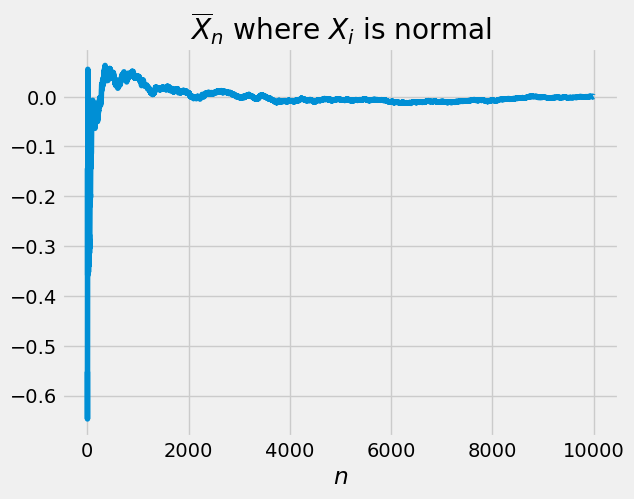

In [162]:
X = np.random.randn(10_000)
n = np.arange(1, X.shape[0] + 1)
plt.plot(n, X.cumsum() / n)
plt.title("$\overline{X}_n$ where $X_i$ is normal")
plt.xlabel("$n$");

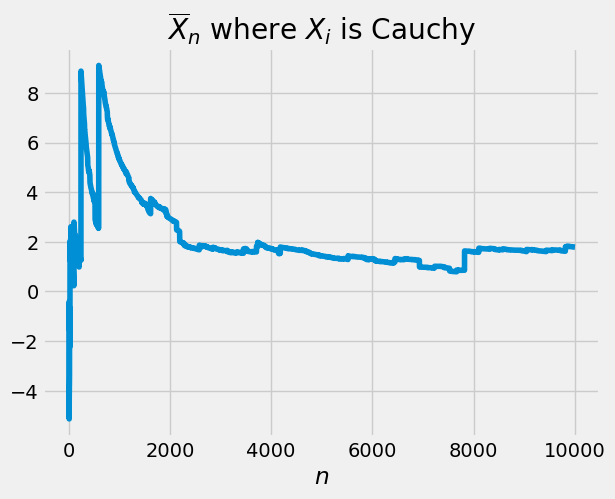

In [7]:
X = np.random.standard_cauchy(10_000)
n = np.arange(1, X.shape[0] + 1)
plt.plot(n, X.cumsum() / n)
plt.title("$\overline{X}_n$ where $X_i$ is Cauchy")
plt.xlabel("$n$");

The results are so different because a Cauchy random variable has no first moment.

## 10.

The moment generating function of a standard normal distribution is $\exp(t^2 / 2)$.
Therefore, $\mathbb{E} e^X = \sqrt{e}$ and $\mathbb{E} e^{2 X} = e^2$.
It follows that $\mathbb{V} e^X = e(e - 1)$.

In [201]:
X = np.random.randn(100_000_000)
Y = np.exp(X)

np.testing.assert_almost_equal(Y.mean(), np.sqrt(np.exp(1)), decimal=2)
np.testing.assert_almost_equal(Y.var(), np.exp(1) * (np.exp(1) - 1), decimal=2)

## 11.

(a) See Question 4.

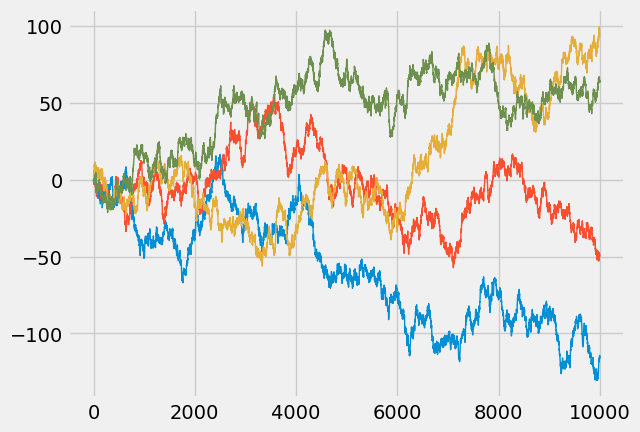

In [189]:
Y = np.random.randn(4, 10_000)
X = Y.cumsum(axis=1)
for x in X:
    plt.plot(x, linewidth=1)

(b) As time $n$ increases, the dispersion from zero increases.
This is explained by $\mathbb{E} X_n = 0$ and $\mathbb{E} V(X_n) = n$ from part (a).

## 12.

Let $X_{1},\ldots X_{n}\sim\operatorname{Bernoulli}(p)$ be IID.
Then, $\mathbb{E}X_{1}=p$ and $\mathbb{V}(X_{1})=\mathbb{E}X_{1}^{2}-(\mathbb{E}X_{1})^{2}=p(1-p)$.
It follows that $S=X_{1}+\cdots+X_{n}\sim\operatorname{Binomial}(n,p)$ with $\mathbb{E}S=np$ and $\mathbb{V}(S)=n\mathbb{V}(X_{1})=np(1-p)$.

---

Let $T\sim\operatorname{Geom}(p)$.
First, note that

$$
\mathbb{E}(T^d)=\sum_{k\geq1}k^dp(1-p)^{k-1}
$$

and hence

$$
\mathbb{E}(T^d)
=\frac{\mathbb{E}(T^d)-(1-p)\mathbb{E}(T^d)}{p}.
$$

Therefore,

$$
\mathbb{E}T
=\sum_{k\geq1}k(1-p)^{k-1}-\sum_{k\geq1}k(1-p)^{k}
=\sum_{k\geq0}(1-p)^{k}=\frac{1}{p}
$$

and

$$
\mathbb{E}(T^{2})
=\sum_{k\geq1}k^{2}(1-p)^{k-1}-\sum_{k\geq1}k^{2}(1-p)^{k}
=\sum_{k\geq0}(1+2k)(1-p)^{k}
=\frac{2-p}{p^{2}}.
$$

It follows that

$$
\mathbb{V}(T)
=\mathbb{E}(T^{2})-(\mathbb{E}T)^{2}
=\frac{1-p}{p^{2}}.
$$

---

Let $X\sim\operatorname{Poisson}(\lambda)$.
Then,

$$
\mathbb{E}X=e^{-\lambda}\sum_{k\geq1}k\frac{\lambda^{k}}{k!}=\lambda e^{-\lambda}\sum_{k\geq0}\frac{\lambda^{k}}{k!}=\lambda.
$$

Moreover,

$$
\mathbb{E}(X^{2})=e^{-\lambda}\sum_{k\geq1}k^{2}\frac{\lambda^{k}}{k!}=\lambda e^{-\lambda}\sum_{k\geq0}(k+1)\frac{\lambda^{k}}{k!}=\lambda^{2}+\lambda.
$$

Therefore, $\mathbb{E}(X^{2})=\lambda$.

---

Let $U\sim\operatorname{Uniform}(0,1)$.
Then,

$$
\mathbb{E}(U^{d})=\int_{0}^{1}u^{d}du=\frac{1}{d+1}.
$$

Therefore, $\mathbb{V}(U)=1/3-1/4=1/12$.
Next, let $X=(b-a)U+a\sim\operatorname{Uniform}(a,b)$.
It follows that

$$
\mathbb{E}X=(b-a)\mathbb{E}U+a=\frac{b-a}{2}+a=\frac{a+b}{2}
$$

and

$$
\mathbb{V}(X)=(b-a)^{2}\mathbb{V}(U)=\frac{(b-a)^{2}}{12}.
$$

---

Let $X\sim\operatorname{Exponential}(\beta)$. Then, by integration by parts,

$$
\mathbb{E}X=\frac{1}{\beta}\int_{0}^{\infty}xe^{-x/\beta}dx=-xe^{-x/\beta}\mid_{0}^{\infty}+\int_{0}^{\infty}e^{-x/\beta}dx=-\beta e^{-x/\beta}\mid_{0}^{\infty}=\beta
$$

and 

$$
\mathbb{E}X^{2}=\frac{1}{\beta}\int_{0}^{\infty}x^{2}e^{-x/\beta}dx=-x^{2}e^{-x/\beta}\mid_{0}^{\infty}+2\int_{0}^{\infty}xe^{-x/\beta}dx=2\beta^{2}.
$$

It follows that $\mathbb{V}(X)=2\beta^{2}-\beta^{2}=\beta^{2}$.

---

Let $X\sim\operatorname{Gamma}(\alpha,\beta)$. Then, for $n\geq1$,

$$
\mathbb{E}(X^{n})=\int_{0}^{\infty}\frac{x^{\alpha-1+n}e^{-x/\beta}}{\beta^{\alpha}\Gamma(\alpha)}dx=\frac{\beta^{\alpha+n}\Gamma(\alpha+n)}{\beta^{\alpha}\Gamma(\alpha)}=(\alpha+n-1)\cdots\alpha\beta^{n}.
$$

It follows that

$$
\mathbb{V}X=(\alpha+1)\alpha\beta^{2}-\alpha^{2}\beta^{2}=\alpha\beta^{2}.
$$

---

Let $X\sim\operatorname{Beta}(\alpha,\beta)$. Then, for $n\geq1$,

$$
\mathbb{E}(X^{n})=\int_{0}^{1}\frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)\Gamma(\beta)}x^{\alpha-1+n}(1-x)^{\beta-1}dx=\frac{\Gamma(\alpha+n)}{\Gamma(\alpha+n+\beta)}\frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)}=\frac{(\alpha+n-1)\cdots\alpha}{(\alpha+n-1+\beta)\cdots(\alpha+\beta)}.
$$

It follows that

$$
\mathbb{V}X=\frac{(\alpha+1)\alpha}{(\alpha+1+\beta)(\alpha+\beta)}-\left(\frac{\alpha}{(\alpha+\beta)}\right)^{2}=\frac{\alpha\beta}{(\alpha+\beta)^{2}(\alpha+\beta+1)}.
$$

## 13.

Let $C$ be the result of the toss.
Then,

$$
\mathbb{E}X=\mathbb{E}(XI_{\{C=H\}}+XI_{\{C=T\}})=\frac{1}{2}\left(\frac{1}{2}+\frac{7}{2}\right)=2.
$$

Similarly,

$$
\mathbb{E}(X^{2})=\mathbb{E}(X^{2}I_{\{C=H\}}+X^{2}I_{\{C=T\}})=\frac{1}{2}\left(\frac{1}{3}+\frac{37}{3}\right)=\frac{19}{3}.
$$

Therefore, $\operatorname{Std}(X)=\sqrt{7/3}$.

In [196]:
p = 1. / 2.
n = 1_000_000
C = np.random.rand(n) < p
X = np.random.rand(n) * C + (3. + np.random.rand(n)) * (1. - C)

np.testing.assert_almost_equal(X.mean(), 2., decimal=3)
np.testing.assert_almost_equal(X.std(), np.sqrt(7. / 3.), decimal=3)

## 14.

For any random variables $X, Y, Z$,

$$
\operatorname{Cov}(X+Y,Z)
=\mathbb{E}((X+Y)Z)-\mathbb{E}(X+Y)\mathbb{E}Z
=\mathbb{E}(XZ)-\mathbb{E}X\mathbb{E}Z+\mathbb{E}(YZ)-\mathbb{E}Y\mathbb{E}Z
=\operatorname{Cov}(X,Z)+\operatorname{Cov}(Y,Z).
$$

Using this, the fact that the covariance function is symmetric, the claim

$$
\operatorname{Cov}\left(\sum_{i=1}^{m}a_{i}X_{i},\sum_{j=1}^{n}b_{j}Y_{j}\right)=\sum_{i=1}^{m}\sum_{j=1}^{n}a_{i}b_{j}\operatorname{Cov}(X_{i},Y_{j})
$$

follows by induction.

## 15.

First, note that $\mathbb{V}(2X-3Y+8)=\mathbb{V}(2X-3Y)$. Moreover,

$$
\mathbb{E}[2X-3Y]=\int_{0}^{1}\int_{0}^{2}(2x-3y)\frac{1}{3}(x+y)dydx=-\frac{23}{9}
$$

and

$$
\mathbb{E}[(2X-3Y)^{2}]=\int_{0}^{1}\int_{0}^{2}(2x-3y)^{2}\frac{1}{3}(x+y)dydx=\frac{86}{9}.
$$

Therefore, the variance is $245/81$.

## 16.

In the absolutely continuous case,

$$
\mathbb{E}[r(X)s(Y)\mid X=x]=\int r(x)s(y)f(y\mid x)dy=r(x)\int s(y)f(y\mid x)dy=r(x)\mathbb{E}[S(Y)\mid X=x].
$$

Taking $s=1$ yields

$$
\mathbb{E}[r(X)\mid X=x]=r(x)\mathbb{E}[1\mid X=x]=r(x).
$$

The discrete case is similar.
Generalizing this to variables that are neither absolutely continuous nor discrete requires [Radon-Nikodym derivatives](https://en.wikipedia.org/wiki/Radon%E2%80%93Nikodym_theorem).

## 17.

This is called the [law of total variance](https://en.wikipedia.org/wiki/Law_of_total_variance).
By the tower property

$$
\mathbb{E}\mathbb{V}(Y\mid X)=\mathbb{E}(\mathbb{E}(Y^{2}\mid X)-\mathbb{E}(Y\mid X)^{2})=\mathbb{E}(Y^{2})-\mathbb{E}(\mathbb{E}(Y\mid X)^{2})
$$

and

$$
\mathbb{V}\mathbb{E}(Y\mid X)=\mathbb{E}(\mathbb{E}(Y\mid X)^{2})-(\mathbb{E}\mathbb{E}(Y\mid X))^{2}=\mathbb{E}(\mathbb{E}(Y\mid X)^{2})-(\mathbb{E}Y)^{2}.
$$

Summing these quantities yields $\mathbb{V}(Y)$.

## 18.

By the tower property,

$$
\mathbb{E}(XY)=\mathbb{E}\mathbb{E}(XY\mid Y)=\mathbb{E}(\mathbb{E}(X\mid Y)Y)=\mathbb{E}(cY)=c\mathbb{E}(Y)
$$

and $\mathbb{E}X\mathbb{E}Y=\mathbb{E}\mathbb{E}(X\mid Y)\mathbb{E}Y=c\mathbb{E}Y$.
It follows that $\operatorname{Cov}(X,Y)=\mathbb{E}(XY)-\mathbb{E}X\mathbb{E}Y=0$ and hence $X$ and $Y$ are uncorrelated.

## 19.

If $X_1, X_2, \ldots$ are IID $\operatorname{Uniform}(0, 1)$, then $\mathbb{E} \overline{X} = \frac{1}{2}$ and $\mathbb{V} \overline{X} = \frac{1}{12 n}$.

In [28]:
ns = (1, 5, 25, 100)
X = np.random.uniform(size=(10_000, ns[-1]))
X_bars = X.cumsum(axis=1) / np.arange(1, X.shape[1] + 1)
table = [(n, 0.5, X_bars[:, n - 1].mean(), 1. / (12 * n), X_bars[:, n - 1].var()) for n in ns]
tabulate(table, headers=("n", "E[X_bar]", "approx E[X_bar]", "V(X_bar)", "approx V(X_bar)"), tablefmt="html")

'<table>\n<thead>\n<tr><th style="text-align: right;">  n</th><th style="text-align: right;">  E[X_bar]</th><th style="text-align: right;">  approx E[X_bar]</th><th style="text-align: right;">   V(X_bar)</th><th style="text-align: right;">  approx V(X_bar)</th></tr>\n</thead>\n<tbody>\n<tr><td style="text-align: right;">  1</td><td style="text-align: right;">       0.5</td><td style="text-align: right;">         0.49876 </td><td style="text-align: right;">0.0833333  </td><td style="text-align: right;">      0.0829786  </td></tr>\n<tr><td style="text-align: right;">  5</td><td style="text-align: right;">       0.5</td><td style="text-align: right;">         0.500962</td><td style="text-align: right;">0.0166667  </td><td style="text-align: right;">      0.0167072  </td></tr>\n<tr><td style="text-align: right;"> 25</td><td style="text-align: right;">       0.5</td><td style="text-align: right;">         0.499669</td><td style="text-align: right;">0.00333333 </td><td style="text-align: right;">      0.0033357  </td></tr>\n<tr><td style="text-align: right;">100</td><td style="text-align: right;">       0.5</td><td style="text-align: right;">         0.50003 </td><td style="text-align: right;">0.000833333</td><td style="text-align: right;">      0.000831198</td></tr>\n</tbody>\n</table>'

While the mean does not change, as $n$ increases, the variance of $\overline{X}$ decays proportional to $1 / n$.
This holds more generally by the [central limit theorem](https://en.wikipedia.org/wiki/Central_limit_theorem).

## 20.

For a vector $a$ with entries $a_i$,

$$
\mathbb{E}(a^{\intercal}X)
=\mathbb{E}\biggl(\sum_i a_i X_i\biggr)
=\sum_i a_i \mathbb{E}X_i
=a^{\intercal}\mathbb{E}X_{n}.
$$

For a matrix $A$ with entries $a_{ij}$, define the column vector $a_{i \star}$ as the transpose of the $i$-th row of $A$.
Then,

$$
e_i^\intercal \mathbb{E}(AX)
=\mathbb{E}(e_i^\intercal(AX))
=\mathbb{E}(a_{i\star}^{\intercal}X)
=a_{i\star}^{\intercal}\mathbb{E}X.
$$

Therefore, $\mathbb{E}(AX) = A\mathbb{E}X$.

Next, using our findings in Question 14,

$$
\mathbb{V}(a^{\intercal}X)=\mathbb{V}\biggl(\sum_{i}a_{i}X_{i}\biggr)=\sum_{ij}a_{i}a_{j}\operatorname{Cov}(X_{i},X_{j})=a^{\intercal}\mathbb{V}(X)a.
$$

As before, we can generalize this to the matrix case by noting that

$$
e_i^\intercal (\mathbb{V}(AX)) e_j
=\operatorname{Cov}(e_i^\intercal(AX),e_j^\intercal(AX))
=\operatorname{Cov}(a_{i\star}^{\intercal}X,a_{j\star}^{\intercal}X)
=\sum_{k\ell}a_{ik}a_{\ell j}\operatorname{Cov}(X_{k},X_{\ell}).
$$

Therefore, $\mathbb{V}(AX) = A\mathbb{V}(X)A^\intercal$.

## 21.

Since

$$
\mathbb{E}(XY)=\mathbb{E}\mathbb{E}(XY\mid X)=\mathbb{E}(X\mathbb{E}(Y\mid X))=\mathbb{E}(X^{2})
$$

and

$$
\mathbb{E}Y=\mathbb{E}\mathbb{E}(Y\mid X)=\mathbb{E}X,
$$

it follows that $\operatorname{Cov}(X,Y)=\mathbb{V}(X)$.

## 22.

(a) Note that $\mathbb{E}(YZ)=\mathbb{E}I_{(a,b)}(X)=b-a$.
Moreover, $\mathbb{E}Y=\mathbb{E}I_{(0,b)}(X)=b$ and $\mathbb{E}Z=\mathbb{E}I_{(a,1)}(X)=1-a$.
Since $\mathbb{E}(YZ)\neq\mathbb{E}Y\mathbb{E}Z$, $Y$ and $Z$ are dependent.

(b) If $Z = 0$, then $X \leq a < b$ and hence $Y = 1$.
Therefore, $\mathbb{E}(Y \mid Z = 0) = 1$ trivially.
Moreover,

$$
\mathbb{E}(Y\mid Z=1)=\frac{\mathbb{E}(YZ)}{\mathbb{E}Z}=\frac{b-a}{1-a}.
$$

In [40]:
a = 0.3
b = 0.5

X = np.random.rand(1_000_000)
Y = X < b
Z = a < X

np.testing.assert_almost_equal((Y * (~Z)).mean() / (~Z).mean(), 1.                , decimal=3)
np.testing.assert_almost_equal((Y *   Z ).mean() /   Z .mean(), (b - a) / (1. - a), decimal=3)

## 23.

Let $K\sim\operatorname{Poisson}(\lambda)$. Then,

$$
\mathbb{E}e^{tK}=\sum_{k\geq0}e^{tk}\frac{\lambda^{k}e^{-\lambda}}{k!}=e^{-\lambda}\sum_{k\geq0}\frac{(\lambda e^{t})^{k}}{k!}=\exp(\lambda(e^{t}-1)).
$$

---

Let $X \sim N(\mu, \sigma^2)$. Then,

$$
\mathbb{E}e^{tX}=\int_{-\infty}^{\infty}\frac{1}{\sqrt{2\pi}\sigma^{2}}\exp\biggl(-\frac{(x-\mu)^{2}}{2\sigma^{2}}+\frac{2\sigma^{2}tx}{2\sigma^{2}}\biggr)dx.
$$

Completing the square,

$$
-(x-\mu)^{2}+2\sigma^{2}tx=-x^{2}+2\mu x-\mu^{2}+2\sigma^{2}tx=-(x-(\sigma^{2}t+\mu))^{2}+\sigma^{4}t^{2}+2\mu\sigma^{2}t.
$$

Therefore, the MGF of $X$ is $\exp(\sigma^{2}t^{2}/2+\mu t)$.

---

Let $Y\sim\operatorname{Gamma}(\alpha,\beta)$ and

$$
\gamma=\frac{\beta}{1-\beta t}.
$$

When $\gamma<0$ (or equivalently, $\beta t<1$), 

$$
\mathbb{E}e^{tY}=\frac{1}{\beta^{\alpha}\Gamma(\alpha)}\int_{0}^{\infty}e^{ty}y^{\alpha-1}e^{-y/\beta}dy=\frac{\gamma^{\alpha}}{\beta^{\alpha}}\frac{1}{\gamma^{\alpha}\Gamma(\alpha)}\int_{0}^{\infty}y^{\alpha-1}e^{-y/\gamma}dy
=\frac{\gamma^{\alpha}}{\beta^{\alpha}}=(1-\beta t)^{-\alpha}.
$$

## 24.

Let $X_{1},\ldots,X_{n}\sim\operatorname{Exp}(\beta)$.
It follows that

$$
\mathbb{E}e^{tX_{i}}=\frac{1}{\beta}\int_{0}^{\infty}e^{tx}e^{-x/\beta}dx=\frac{\gamma}{\beta}\frac{1}{\gamma}\int_{0}^{\infty}e^{-x/\gamma}dx=\frac{\gamma}{\beta}
$$

where $\gamma$ is defined in the answer to the previous question.
It follows that

$$
\mathbb{E}e^{t\sum_{i}X_{i}}=(\mathbb{E}e^{t})^{n}=\frac{\gamma^{n}}{\beta^{n}}
$$

and hence, by our findings in the previous question, $\sum_{i}X_{i}\sim\operatorname{Gamma}(n,\beta)$.